# Task 2

## **Exploratory Data Analysis (EDA)**


## Making analysis of

1. what **dominates netflix** TV shows or Movies.
2. **Trend** of Content Added by Year.
3. **Movies vs TV Shows** Added Over the Years.
4. **Top 10** contributing countries.


In [1]:
# IMporting required libraries for this task.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
# Importing cleaned dataset from task 1.

df = pd.read_csv(r"../dataset/netflix_cleaned.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


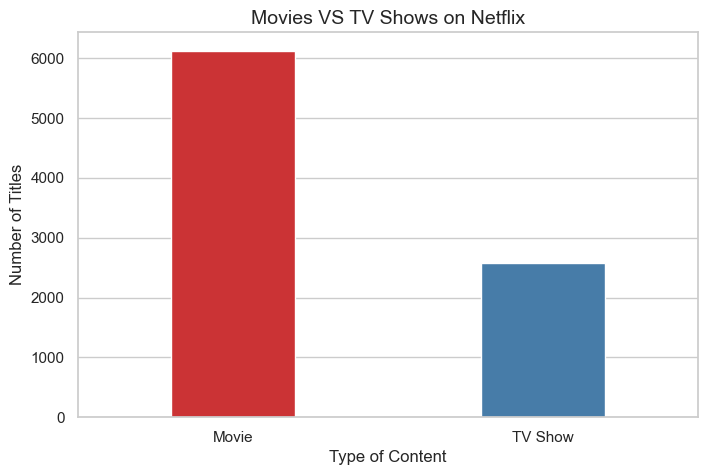

In [3]:
plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x="type", palette="Set1", width=0.4)
sns.countplot(data=df, x="type", hue="type", palette="Set1", width=0.4, legend=False)

plt.title("Movies VS TV Shows on Netflix", fontsize=14)
plt.xlabel("Type of Content", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.show()

Netflix has significantly more Movies than TV Shows in the dataset, indicating a heavier focus on film content.


In [4]:
# counting the frequency of content addition over a year.
print("content added in each year:\n", df["year_added"].value_counts())

content_by_year = df["year_added"].value_counts().sort_index()

content added in each year:
 year_added
2019    1999
2020    1878
2018    1625
2021    1498
2017    1163
2016     416
2015      73
2014      23
2011      13
2013      10
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64


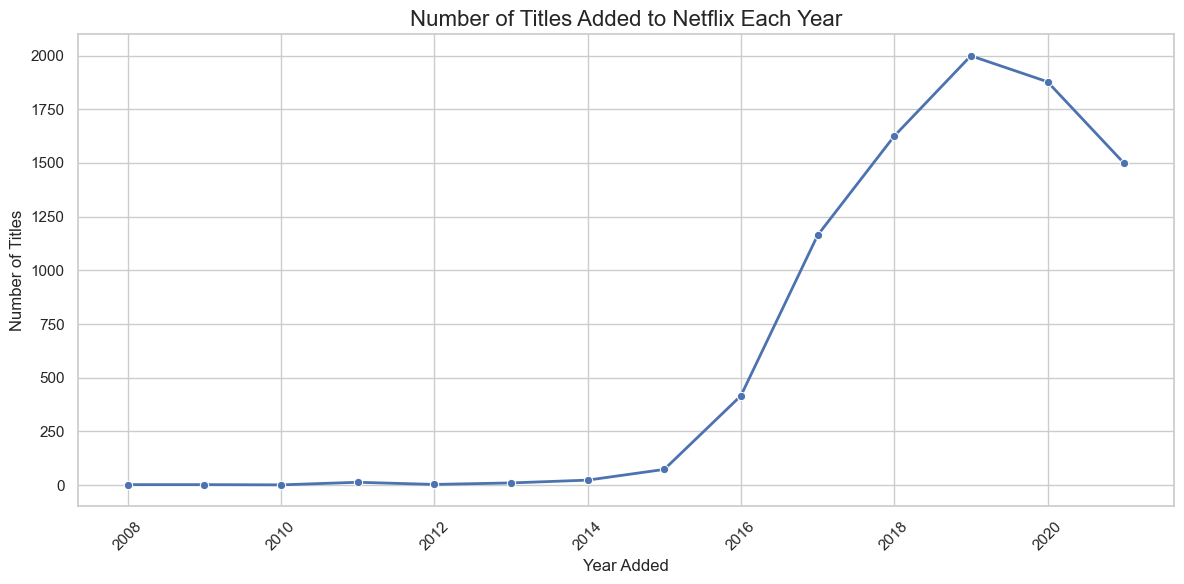

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker="o", linewidth=2)

plt.title("Number of Titles Added to Netflix Each Year", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Netflix saw a sharp increase in new content additions starting in 2016, peaking in 2019, with some decline or fluctuation during the pandemic years.


In [6]:
grouped_data = df.groupby(["year_added", "type"]).size()
grouped_data = grouped_data.unstack()
grouped_data

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,4.0
2014,19.0,4.0
2015,56.0,17.0
2016,251.0,165.0


<Figure size 1200x600 with 0 Axes>

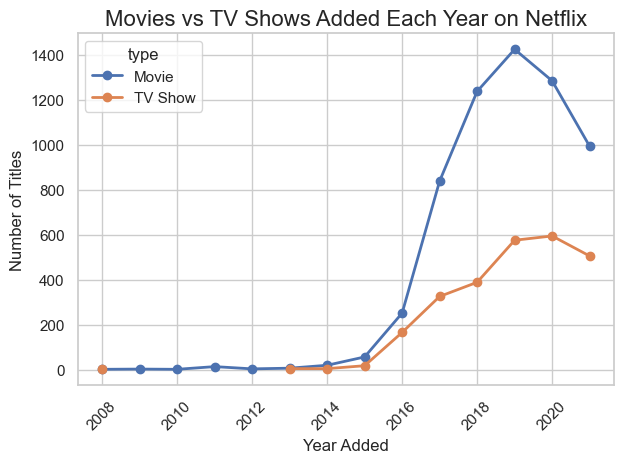

In [7]:
plt.figure(figsize=(12, 6))
grouped_data.plot(kind="line", marker="o", linewidth=2)

plt.title("Movies vs TV Shows Added Each Year on Netflix", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Netflix heavily ramped up movies from 2016–2019


In [8]:
df_country = df.copy()

In [9]:
df_country["country"] = df_country["country"].str.split(", ")
df_country = df_country.explode("country")

In [10]:
country_counts = df_country["country"].value_counts().head(10)
print(country_counts)
print("\n", df_country["country"].nunique())

country
United States     4466
India             1045
United Kingdom     785
Canada             432
France             389
Japan              314
Spain              228
South Korea        226
Germany            225
Mexico             169
Name: count, dtype: int64

 127


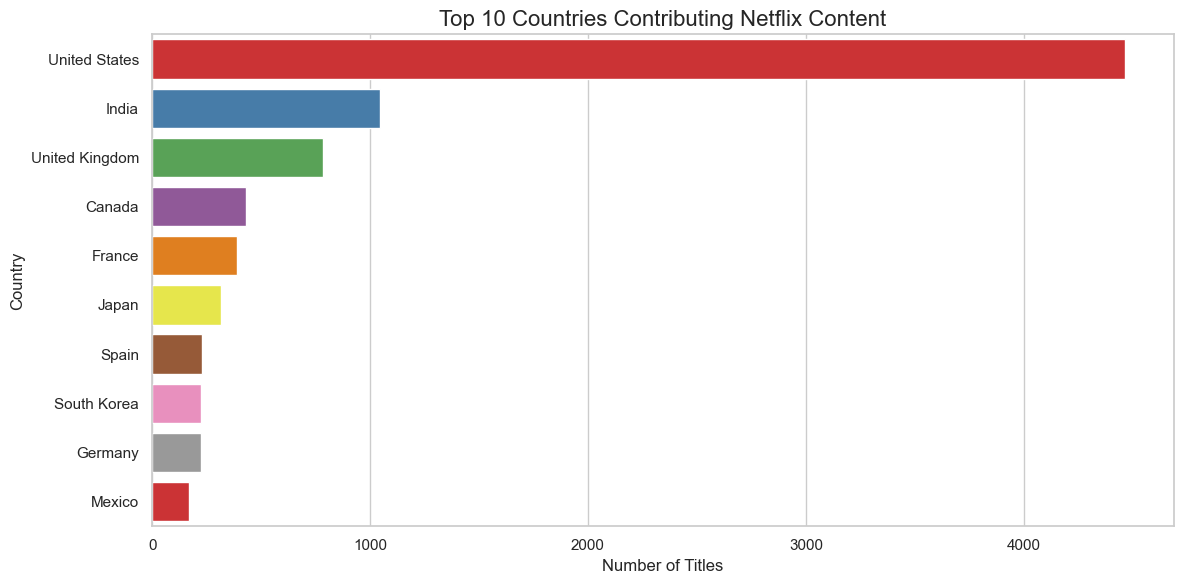

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    palette="Set1",
    hue=country_counts.index,
    legend=False,
)

plt.title("Top 10 Countries Contributing Netflix Content", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Netflix EDA – Key Insights

## 1. Content Type Distribution

- **Movies dominate** Netflix's library.
- The total number of Movies is significantly higher than TV Shows.

## 2. Trend of Content Over the Years

- Content additions have **increased rapidly since 2016**, peaking around 2019–2020.
- Netflix's early years (pre-2014) had relatively few content additions.

## 3. Movies vs TV Shows Over Time

- Both categories have grown over time.
- However, **Movies consistently outnumber TV Shows**.
- TV Shows have seen **steady growth in recent years**, indicating Netflix’s strategic push into episodic content.

## 4. Top Content-Producing Countries

- The **United States** contributes the most content to Netflix.
- Other top contributors include **India**, **United Kingdom**, **Canada**, and **France**.
- The **Top 10 countries account for the majority** of titles on the platform, while most other countries contribute very few.

---
